# Numerical integration example

Volume integration in N-D

Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

### (1) Shape definition

In [2]:
# Defines the unit shere in arbitrary number of dimensions

def isInside(x) :
    "Sphere with unit radius and origing at (0,0,0)"
    r2 = np.sum(x*x)
    return int( r2 < 1 )

### (2) Run numerical integration of volume

In [3]:
def intVol(Ndim, Ndiv):

    # Integration range (common for all coordinates)

    Xmin = -1.
    Xmax = 1.

    dX = (Xmax-Xmin)/Ndiv
    
    # Test points in one coordinate

    Xrange = np.arange(Xmin+dX/2.,Xmax,dX)

    # Test points in Ndim
    
    ND = Ndiv**Ndim   # Number of points in the grid

    Xgrid = np.empty((ND,Ndim))
    
    # Point index in Ndim can be decoded into Ndim indexes to 1D value table
    
    for ind in range(ND):
        ival = ind                 # Make a copy not to affect loop counter
        for idim in range(Ndim):
            i1d = ival%Ndiv
            Xgrid[ind,idim] = Xrange[i1d]
            ival//=Ndiv
           
    # Main loop

    V = 0
    dV = dX**Ndim

    for ind in range(ND):
        V+=dV*isInside(Xgrid[ind])
    
    return V

### (3) Integration with increasing precision

In [4]:
Ndim = 5

# Test values for number of divisions

n_tab = np.array([3,4,5,7,10,15,20,25]) # ,30,35,40,50,70,100])

# Main loop

v_tab = np.empty(n_tab.size)

print("Numerical integration:")

for ind in range(n_tab.size):
    n = n_tab[ind]
    v_tab[ind] = intVol(Ndim,n)
    print(n,v_tab[ind])

Numerical integration:
3 6.716049382716052
4 6.0
5 5.867519999999933
7 5.451062057475715
10 4.88448000000038
15 5.34195094650478
20 5.303679999968383
25 5.28626810876283


In [5]:
# Expected volume

Vexp = np.pi**(Ndim/2.)/gamma(1.+Ndim/2.)

print("Expected value: ",Vexp)

Expected value:  5.263789013914324


### (4) Plot results

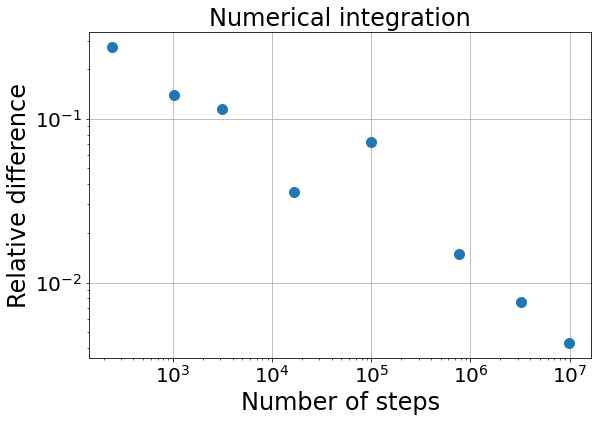

In [6]:
# Create result graph

nd_tab = n_tab**Ndim

dv_tab = np.abs(v_tab/Vexp - 1.)

plt.figure(figsize=(9, 6))

plt.loglog(nd_tab,dv_tab,'o',markersize=10)

plt.title("Numerical integration",size=24)
plt.xlabel('Number of steps',size=24)
plt.ylabel('Relative difference',size=24)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(which='major', axis='both')

fname = '05_numerical_integration_2.png'
plt.savefig(fname)

plt.show()